In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
raw_data = pd.read_csv('한국지능정보사회진흥원_2021년 스마트폰과의존실태조사 Raw Data(공개용)_20220509.csv', encoding='euc-kr')
raw_data.head()

C:\Users\seung\AppData\Local\Temp\ipykernel_27252\2180944274.py:1: DtypeWarning: Columns (122,134,143,166,208,210,224,228) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('한국지능정보사회진흥원_2021년 스마트폰과의존실태조사 Raw Data(공개용)_20220509.csv', encoding='euc-kr')


,ZID,HOUSE,H_RELATION,H_SEX,H_AGE,H_SM,H_IN,H_TA,RELATION,SEX,...,SQ4,SQ4_T,SQ5,SQ6,SQ7,SQ7_T,SQ8,DEMO02,DEMO23,WT1
0,1,2,1,2,33,1,1,1,1,2,...,4.0,NaN,4.0,2,NaN,NaN,2,3,1,1353.2588
1,2,2,1,1,40,1,1,1,1,1,...,4.0,NaN,4.0,2,NaN,NaN,2,3,1,1712.4662
2,3,2,1,1,59,1,1,1,1,1,...,3.0,NaN,5.0,2,NaN,NaN,2,3,1,1609.1046
3,4,2,1,1,49,1,1,1,1,1,...,3.0,NaN,5.0,2,NaN,NaN,2,3,1,1712.4662
4,5,2,1,1,55,1,1,1,1,1,...,5.0,NaN,3.0,2,NaN,NaN,2,3,1,1609.1046


# 가설
- 괄호 안은 RAW 데이터 코드

- 스마트폰 과의존 예방교육을 경험한 사람이 경험하지 않은 사람보다 ... (Q6)
1. 본인의 하루 평균 스마트폰 이용시간의 과도함 평가를 과도하다고 평가했을 것이다. (Q2B)
1. 주변인과 비교했을 때 자신의 스마트폰 의존도 평가에 있어서 의존도가 높다고 답했을 것이다. (Q4)
1. 우리 사회의 스마트폰 과의존 문제가 심각하다고 답했을 것이다.(Q9 - 만 10세 이상)
1. 일상생활 속 본인의 스마트폰 이용 적절성이 부적절하다고 답했을 것이다.(Q12)

- 

# 데이터 전처리

In [3]:
data = raw_data[['Q6','Q2B', 'Q4', 'Q9', 'Q12']]
del(raw_data)
data.head()

,Q6,Q2B,Q4,Q9,Q12
0,2,3,3,3.0,3.0
1,2,2,3,3.0,3.0
2,2,3,3,3.0,3.0
3,2,3,3,3.0,3.0
4,2,2,2,3.0,3.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25198 entries, 0 to 25197
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q6      25198 non-null  int64  
 1   Q2B     25198 non-null  int64  
 2   Q4      25198 non-null  int64  
 3   Q9      24058 non-null  float64
 4   Q12     24058 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 984.4 KB


## 컬럼명 변경

In [5]:
data.rename(columns={
                     'Q6':'예방교육',
                     'Q2B':'시간과도성',
                     'Q4':'의존도_본인',
                     'Q9':'의존도_사회',
                     'Q12':'이용적절성',
                    },
            inplace=True
           )
data.columns

Index(['예방교육', '시간과도성', '의존도_본인', '의존도_사회', '이용적절성'], dtype='object')

## dtype변경

In [6]:
data = data.astype('int8', errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25198 entries, 0 to 25197
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   예방교육    25198 non-null  int8   
 1   시간과도성   25198 non-null  int8   
 2   의존도_본인  25198 non-null  int8   
 3   의존도_사회  24058 non-null  float64
 4   이용적절성   24058 non-null  float64
dtypes: float64(2), int8(3)
memory usage: 467.7 KB


In [7]:
data.head()

,예방교육,시간과도성,의존도_본인,의존도_사회,이용적절성
0,2,3,3,3.0,3.0
1,2,2,3,3.0,3.0
2,2,3,3,3.0,3.0
3,2,3,3,3.0,3.0
4,2,2,2,3.0,3.0


In [8]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 가설 검증 - 스마트폰 과의존 예방교육 경험 여부
## 스마트폰 과의존 예방교육을 경험한 사람이 경험하지 않은 사람보다 본인의 하루 평균 스마트폰 이용시간이 더 과도하다고 평가했을 것이다.

In [9]:
edu_y = data.groupby('예방교육')[['시간과도성']].value_counts().sort_index()[1]
edu_n = data.groupby('예방교육')[['시간과도성']].value_counts().sort_index()[2]

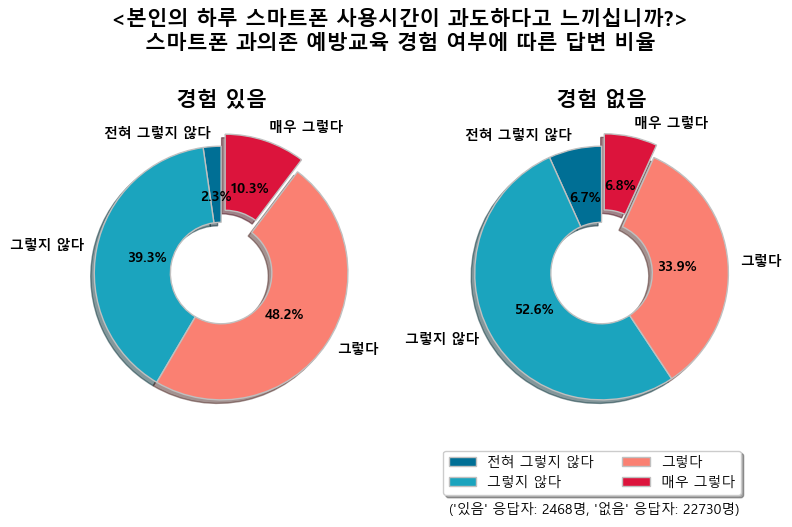

In [10]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(9, 6.5)

label = ['전혀 그렇지 않다', '그렇지 않다', '그렇다', '매우 그렇다']
color = ['#006f95','#1ba4be', 'Salmon', 'Crimson']
explode = [0, 0, 0, 0.1]
wedgeprops={'width':0.6, 'edgecolor': 'silver'}
textprops={'weight':'bold'}

ax[0].pie(x=edu_y,
            autopct='%.1f%%',
            labels=label,
            colors=color,
            shadow=True,
            startangle=90,
            wedgeprops=wedgeprops,
            textprops=textprops,
            explode=explode,
            )
ax[0].set_title('경험 있음',
                fontdict={'size':15, 'weight':'bold'},
               )
ax[1].pie(x=edu_n,
            autopct='%.1f%%',
            labels=label,
            colors=color,
            shadow=True,
            startangle=90,
            wedgeprops=wedgeprops,
            textprops=textprops,
            explode=explode,
            )
ax[1].set_title('경험 없음',
                fontdict={'size':15, 'weight':'bold'},
               )

plt.suptitle(f"<본인의 하루 스마트폰 사용시간이 과도하다고 느끼십니까?>\n스마트폰 과의존 예방교육 경험 여부에 따른 답변 비율",
             size=15,
             weight='bold',
             x=0.5,
             y=0.9,
            )
plt.legend(ncols=2,
           loc=(0, -0.2),
           labels=label,
           shadow=True,
          )

answer_y = data.groupby('예방교육')[['시간과도성']].value_counts().sort_index()[1].sum()
answer_n = data.groupby('예방교육')[['시간과도성']].value_counts().sort_index()[2].sum()

plt.text(-1.2, -1.9, f"('있음' 응답자: {answer_y}명, '없음' 응답자: {answer_n}명)", bbox={'boxstyle':'round', 'color':'w'})

plt.savefig('graph/예방교육_과도함.png')
plt.show()

In [11]:
## 카이제곱검정 - 변수 간 독립성 검정
# 빈도표
df_chi = data.groupby('예방교육')[['시간과도성']].value_counts().sort_index()\
.unstack().rename(index={1:'경험 있음', 2:'경험 없음'},
                  columns={1:'전혀 그렇지 않다', 2:'그렇지 않다', 3:'그렇다', 4:'매우 그렇다'})
df_chi

시간과도성,전혀 그렇지 않다,그렇지 않다,그렇다,매우 그렇다
예방교육,,,,
경험 있음,56,969,1189,254
경험 없음,1531,11954,7707,1538


In [12]:
# 검정값
chiresult = chi2_contingency(df_chi)
print(f'카이제곱 : {chiresult.statistic}')
print(f'P값 : {chiresult.pvalue}')

카이제곱 : 314.9522575375269
P값 : 5.773259545409229e-68


[가설 검증1] 스마트폰 과의존 예방교육을 경험한 사람이 경험하지 않은 사람보다 본인의 하루 평균 스마트폰 이용시간이 더 과도하다고 평가했을 것이다.
- <<카이제곱검정>>
    - H0(귀무가설) : '스마트폰 과의존 예방교육 경험 여부'와 '본인의 하루 평균 스마트폰 이용시간의 과도함 평가'는 독립적이다.
    - H1(대립가설) : H0이 아니다.
    - 유의수준(0.05)보다 P값(5.77e-68)이 낮기 때문에 영가설을 기각한다. 즉, 스마트폰 과의존 예방교육 경험 여부와 본인의 하루 평균 스마트폰 이용시간의 과도함 평가에는 상관관계가 있다.
<br><br>
- <<결론>>
    - 스마트폰 과의존 예방교육을 경험한 사람 중 자신의 스마트폰 사용시간이 '과도하지 않다'라고 응답한 비율은 41.6%이고, '과도하다'라고 응답한 비율은 58.5%이다.
    - 스마트폰 과의존 예방교육을 경험하지 않은 사람 중 자신의 스마트폰 사용시간이'과도하지 않다'라고 응답한 비율은 59.3%이고, '과도하다'라고 응답한 비율은 40.7%이다.
    - 따라서 스마트폰 과의존 예방교육을 경험한 사람이 그렇지 않은 사람에 비해서 자신의 스마트폰 사용시간이 과도하다고 평가하는 경향이 있으며, 과도함의 정도도 '매우 그렇다'라고 평가했다.
        - [계산 방식]
            - '과도하지 않다' = '전혀 그렇지 않다' + '그렇지 않다'
            - '과도하다' = '그렇다'+'매우 그렇다'
            - '매우 그렇다'에 대한 답변 비율 : 예방교육 경험자 = 10.3%, 예방교육 미경험자 = 6.8%

## 스마트폰 과의존 예방교육을 경험한 사람이 경험하지 않은 사람보다 주변인과 비교했을 때 자신의 스마트폰 의존도 평가에 있어서 의존도가 높다고 답했을 것이다.

In [13]:
edu_y = data.groupby('예방교육')['의존도_본인'].value_counts().sort_index()[1]
edu_n = data.groupby('예방교육')['의존도_본인'].value_counts().sort_index()[2]

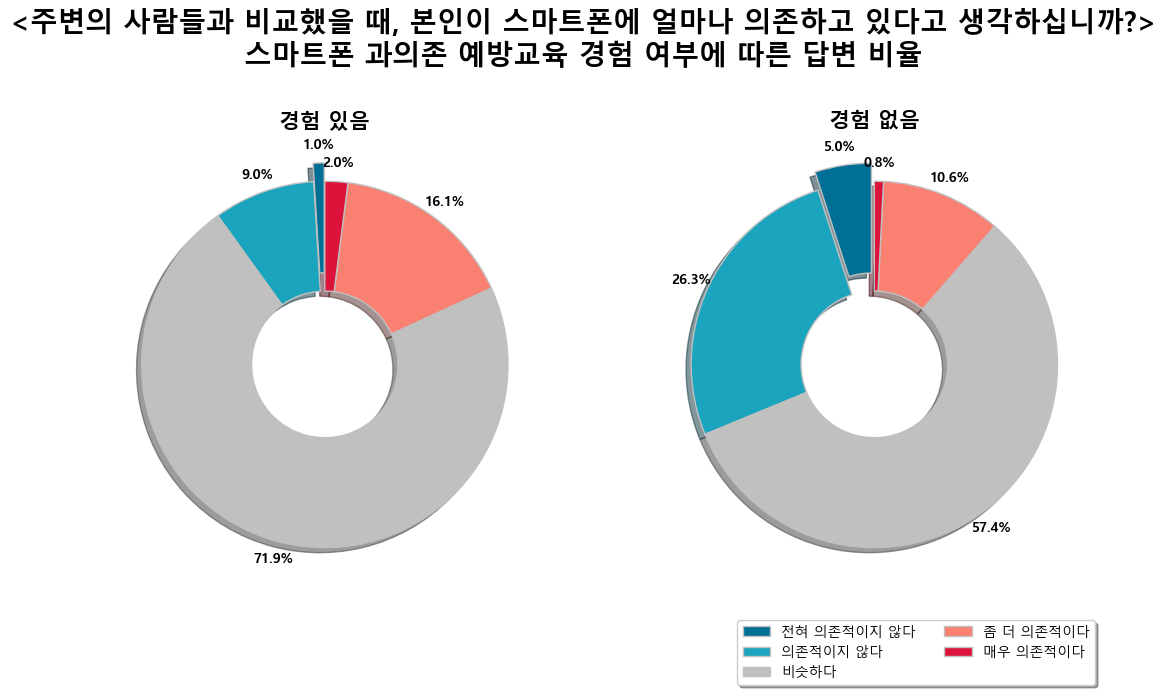

In [14]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(13, 10)
label = ['전혀 의존적이지 않다', '의존적이지 않다', '비슷하다', '좀 더 의존적이다',  '매우 의존적이다']
explode = [0.1, 0, 0, 0, 0]
color = [ '#006f95','#1ba4be', 'silver', 'Salmon', 'Crimson']
wedgeprops={'width':0.6, 'edgecolor': 'silver'}
textprops={'weight':'bold'}

ax[0].pie(
    x=edu_y,
    autopct='%.1f%%',
    pctdistance=1.1,
#     labels=label,
    explode=explode,
    colors=color,
    startangle=90,
    textprops=textprops,
    wedgeprops=wedgeprops,
    shadow=True,
)
ax[0].set_title('경험 있음',
                fontdict={'size':15, 'weight':'bold'},
                 )

ax[1].pie(
    x=edu_n,
    autopct='%.1f%%',
    pctdistance=1.1,
#     labels=label,
    explode=explode,
    colors=color,
    startangle=90,
    textprops=textprops,
    wedgeprops=wedgeprops,
    shadow=True,
)
ax[1].set_title('경험 없음',
                fontdict={'size':15, 'weight':'bold'},
                 )
plt.suptitle(f"<주변의 사람들과 비교했을 때, 본인이 스마트폰에 얼마나 의존하고 있다고 생각하십니까?>\n스마트폰 과의존 예방교육 경험 여부에 따른 답변 비율",
             size=20,
             weight='bold',
             x=0.5,
             y=0.85,
            )
plt.legend(ncols=2,
           loc=(0.2, -0.2),
           labels=label,
           shadow=True,
           fontsize=10
          )
plt.savefig('graph/예방교육_의존도.png')
plt.show()

In [15]:
## 카이제곱검정 - 변수 간 독립성 검정
# 빈도표
df_chi = data.groupby('예방교육')[['의존도_본인']].value_counts().sort_index().unstack()\
.rename(index={1:'경험 있음', 2:'경험 없음'},
        columns={1:'전혀 의존적이지 않다', 2:'의존적이지 않다', 3:'비슷하다', 4:'좀 더 의존적이다', 5:'매우 의존적이다'})
df_chi

의존도_본인,전혀 의존적이지 않다,의존적이지 않다,비슷하다,좀 더 의존적이다,매우 의존적이다
예방교육,,,,,
경험 있음,24,221,1775,398,50
경험 없음,1133,5967,13038,2410,182


In [16]:
# 검정값
chiresult = chi2_contingency(df_chi)
print(f'카이제곱 : {chiresult.statistic}')
print(f'P값 : {chiresult.pvalue}')

카이제곱 : 526.8179272521958
P값 : 1.0597826059891943e-112


[가설 검증2] 스마트폰 과의존예방교육을 경험한 사람이 경험하지 않은 사람보다 주변인과 비교한 자신의 스마트폰 의존도 평가에 있어서 의존도가 높다고 답했을 것이다.
- <<카이제곱검정>>
    - H0(귀무가설) : '스마트폰 과의존 예방교육 경험 여부'와 '주변인과 비교한 자신의 스마트폰 의존도 평가'는 독립적이다.
    - H1(대립가설) : H0이 아니다.
    - 유의수준(0.05)보다 P값(1.06e-112)이 낮기 때문에 영가설을 기각한다. 즉, 스마트폰 과의존 예방교육 경험 여부와 주변인과 비교한 자신의 스마트폰 의존도 평가에는 상관관계가 있다.
<br><br>
- <<결론>>
    - 스마트폰 과의존 예방교육을 경험한 사람은 타인과 비교한 본인의 스마트폰 의존 정도를 그렇지 않은 사람에 비해서 의존적이라고 평가하는 비율이 더 많았으며, 의존성의 정도도 더 강하다고 평가하였다.
    - 특히 '의존적이지 않다'라고 응답한 비율이 전자는 10%인 반면 후자는 31.3%로 약 3배의 차이를 보였다.
        - [계산방식]
            - '의존적이지 않다' = '전혀 의존적이지 않다' + '의존적이지 않다'
            - '의존적이다' = '매우 의존적이다' + '좀 더 의존적이다'
            - 예방교육 경험 '있음'의 경우 : '의존적이지 않다'-10.0%, '의존적이다'-18.1%
            - 예방교육 경험 '없음'의 경우 : '의존적이지 않다'-31.3%, '의존적이다'-11.4%

## 스마트폰 과의존 예방교육을 경험한 사람이 경험하지 않은 사람보다 우리사회 스마트폰 사용 의존도가 높다고 답했을 것이다. (10세 이상만)

In [17]:
data_3 = data[['예방교육', '의존도_사회']].dropna().astype('int8')

In [18]:
edu_y = data_3.groupby('예방교육').value_counts().sort_index()[1]
edu_n = data_3.groupby('예방교육').value_counts().sort_index()[2]

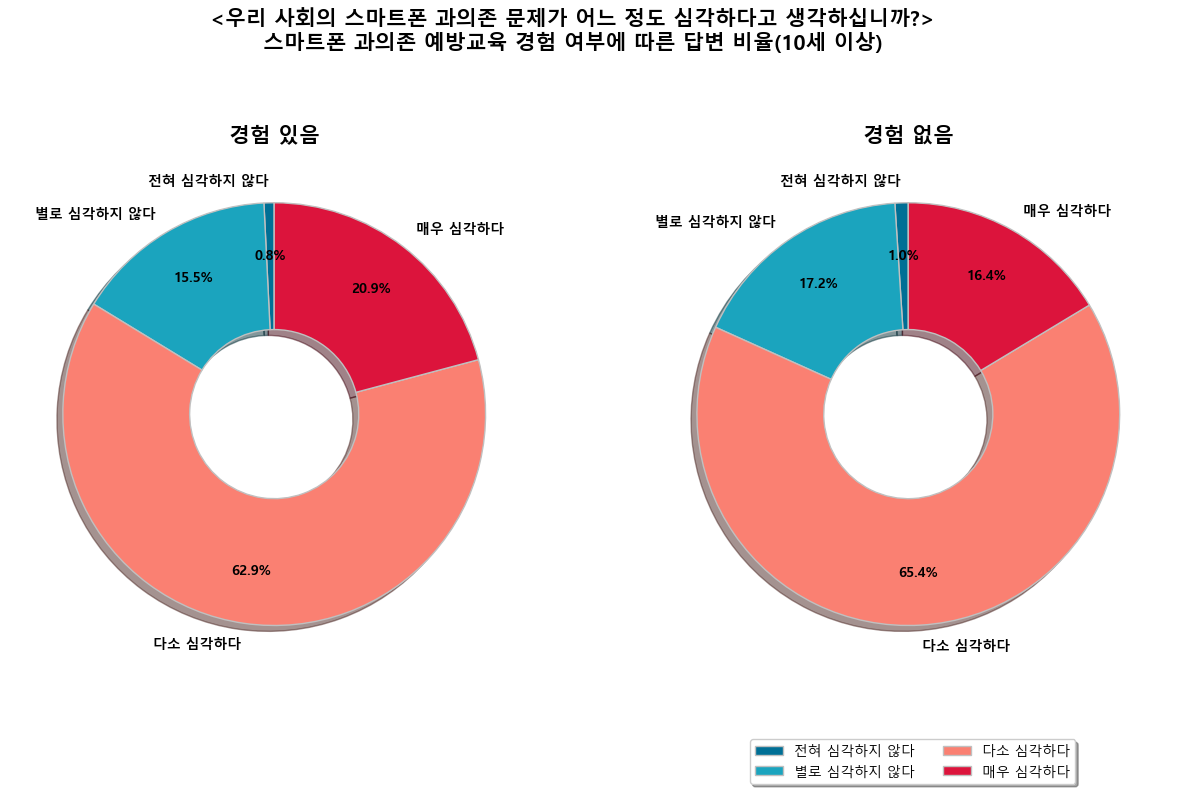

In [19]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 10)
label = ['전혀 심각하지 않다', '별로 심각하지 않다', '다소 심각하다', '매우 심각하다']
color = ['#006f95', '#1ba4be', 'Salmon', 'Crimson']
wedgeprops={'width':0.6, 'edgecolor': 'silver'}
textprops={'weight':'bold'}

ax[0].pie(
    x=edu_y,
    autopct='%.1f%%',
    pctdistance=0.75,
    labels=label,
    colors=color,
    startangle=90,
    textprops=textprops,
    wedgeprops=wedgeprops,
    shadow=True,
)
ax[0].set_title('경험 있음',
                fontdict={'size':15, 'weight':'bold'},
                 )

ax[1].pie(
    x=edu_n,
    autopct='%.1f%%',
    pctdistance=0.75,
    labels=label,
    colors=color,
    startangle=90,
    textprops=textprops,
    wedgeprops=wedgeprops,
    shadow=True,
)
ax[1].set_title('경험 없음',
                fontdict={'size':15, 'weight':'bold'},
                 )
plt.suptitle(f"<우리 사회의 스마트폰 과의존 문제가 어느 정도 심각하다고 생각하십니까?>\n스마트폰 과의존 예방교육 경험 여부에 따른 답변 비율(10세 이상)",
             size=15,
             weight='bold',
             x=0.5,
             y=0.9,
            )
plt.legend(ncols=2,
           loc=(0.2, -0.2),
           labels=label,
           shadow=True,
          )
plt.savefig('graph/예방교육_의존도_사회.png')
plt.show()

In [20]:
## 카이제곱검정 - 변수 간 독립성 검정
# 빈도표
df_chi = data_3.groupby('예방교육').value_counts().sort_index().unstack().rename(index={1:'경험 있음', 2:'경험 없음'}, columns={1:'전혀 심각하지 않다', 2:'별로 심각하지 않다', 3:'다소 심각하다', 4:'매우 심각하다'})
df_chi

의존도_사회,전혀 심각하지 않다,별로 심각하지 않다,다소 심각하다,매우 심각하다
예방교육,,,,
경험 있음,18,360,1459,484
경험 없음,220,3749,14209,3559


In [21]:
# 검정값
chiresult = chi2_contingency(df_chi)
print(f'카이제곱 : {chiresult.statistic}')
print(f'P값 : {chiresult.pvalue}')

카이제곱 : 31.958921932220164
P값 : 5.338835015159137e-07


[가설 검증3] 스마트폰 과의존 예방교육을 경험한 사람이 경험하지 않은 사람보다 우리 사회의 스마트폰 과의존 문제가 심각하다고 답했을 것이다.
- <<카이제곱검정>>
    - H0(귀무가설) : '스마트폰 과의존 예방교육 경험 여부'와 '우리 사회의 스마트폰 과의존 문제 심각성 평가'는 독립적이다.
    - H1(대립가설) : H0이 아니다.
    - 유의수준(0.05)보다 P값(5.33e-07)이 낮기 때문에 영가설을 기각한다. 즉, 스마트폰 과의존 예방교육 경험과 우리 사회의 스마트폰 과의존 문제 심각성 평가 응답에는 상관관계가 있다.
<br><br>
- <<결론>>
    - 스마트폰 과의존 예방교육을 경험한 사람과 아닌 사람들이 우리 사회의 스마트폰 과의존 문제가 '심각하다'고 평가한 사람은 각각 83.8%, 81%로 나타나, 예방교육을 경험한 사람이 2.8%p 높아 우리 사회의 스마트폰 과의존 문제의 심각성에 대한 부정적 평가 비율은 큰 차이가 없었으나, 그 정도에 대해 '매우 심각하다'고 답변한 비율은 각각 20.9%와 16.4%로 예방교육을 받은 사람이 그렇지 않은 사람에 비해 약 1.27배 더 높은 비율로 나타났다.
    - [계산방식]
        - '심각하다' = '매우 심각하다' + '다소 심각하다'
        - '심각하지 않다' = '전혀 심각하지 않다' + '별로 심각하지 않다'

## 스마트폰 과의존 예방교육을 경험한 사람이 경험하지 않은 사람보다 일상생활 속 본인의 스마트폰 이용 적절성이 부적절하다고 답했을 것이다.(10세 이상)

In [22]:
data4 = data[['예방교육', '이용적절성']].dropna().astype('int8')
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24058 entries, 0 to 25196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   예방교육    24058 non-null  int8 
 1   이용적절성   24058 non-null  int8 
dtypes: int8(2)
memory usage: 234.9 KB


In [23]:
# 코드북에 정의되지 않은 데이터 제거
data4[data4.이용적절성 != 5].groupby('예방교육').value_counts().sort_index()

예방교육  이용적절성
1     1           99
      2          346
      3         1760
      4          115
2     1         1321
      2         2258
      3        16660
      4         1495
Name: count, dtype: int64

In [24]:
edu_y = data4[data4.이용적절성 != 5].groupby('예방교육').value_counts().sort_index()[1]
edu_n = data4[data4.이용적절성 != 5].groupby('예방교육').value_counts().sort_index()[2]

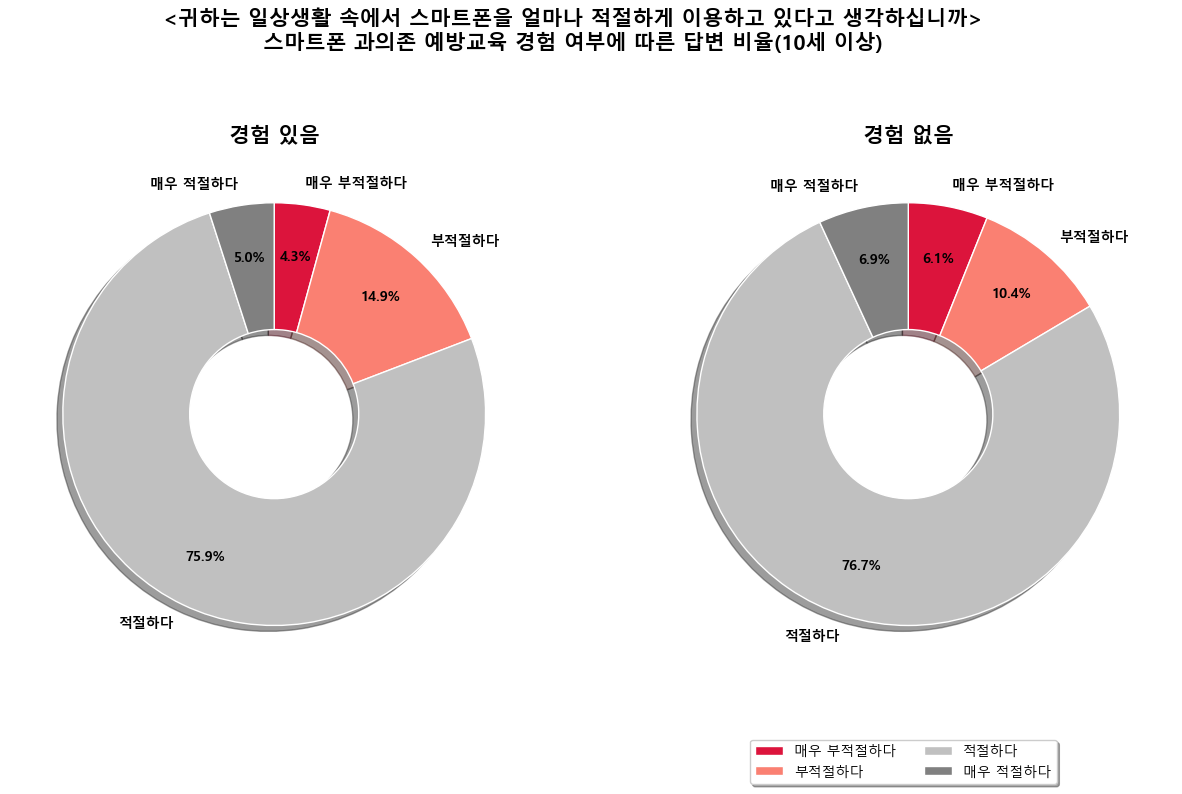

In [25]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 10)
label = ['매우 부적절하다', '부적절하다', '적절하다', '매우 적절하다']
color = ['Crimson', 'Salmon','Silver', 'Gray' ]
wedgeprops={'width':0.6,
            'edgecolor': 'w',
           }
textprops={'weight':'bold'}

ax[0].pie(
    x=edu_y,
    autopct='%.1f%%',
    pctdistance=0.75,
    labels=label,
    colors=color,
    startangle=90,
    textprops=textprops,
    wedgeprops=wedgeprops,
    shadow=True,
    counterclock=False,
)
ax[0].set_title('경험 있음',
                fontdict={'size':15, 'weight':'bold'},
                 )

ax[1].pie(
    x=edu_n,
    autopct='%.1f%%',
    pctdistance=0.75,
    labels=label,
    colors=color,
    startangle=90,
    textprops=textprops,
    wedgeprops=wedgeprops,
    shadow=True,
    counterclock=False,
)
ax[1].set_title('경험 없음',
                fontdict={'size':15, 'weight':'bold'},
                 )
plt.suptitle(f"<귀하는 일상생활 속에서 스마트폰을 얼마나 적절하게 이용하고 있다고 생각하십니까>\n스마트폰 과의존 예방교육 경험 여부에 따른 답변 비율(10세 이상)",
             size=15,
             weight='bold',
             x=0.5,
             y=0.9,
            )
plt.legend(ncols=2,
           loc=(0.2, -0.2),
           labels=label,
           shadow=True,
          )
plt.savefig('graph/예방교육_적절성.png')
plt.show()

In [26]:
## 카이제곱검정 - 변수 간 독립성 검정
# 빈도표
df_chi = data4[data4.이용적절성 != 5].groupby('예방교육').value_counts().unstack().rename(index={1:'경험 있음', 2:'경험 없음'}, columns={1:'매우 부적절하다', 2:'부적절하다', 3:'적절하다', 4:'매우 적절하다'})
df_chi

이용적절성,매우 부적절하다,부적절하다,적절하다,매우 적절하다
예방교육,,,,
경험 있음,99,346,1760,115
경험 없음,1321,2258,16660,1495


In [27]:
# 검정값
chiresult = chi2_contingency(df_chi)
print(f'카이제곱 : {chiresult.statistic}')
print(f'P값 : {chiresult.pvalue}')

카이제곱 : 63.02128304547387
P값 : 1.3289853247112258e-13


[가설 검증4] 스마트폰 과의존 예방교육을 경험한 사람이 경험하지 않은 사람보다 일상생활 속 본인의 스마트폰 이용 적절성이 부적절하다고 답했을 것이다.
- <<카이제곱검정>>
    - H0(귀무가설) : '스마트폰 과의존 예방교육 경험 여부'와 '일상생활 속 본인의 스마트폰 이용 적절성 평가 지표'는 독립적이다.
    - H1(대립가설) : H0이 아니다.
    - 유의수준(0.05)보다 P값(1.33e-13)이 낮기 때문에 영가설을 기각한다. 즉, 스마트폰 과의존 예방교육 경험과 일상생활 속 본인의 스마트폰 이용 적절성 평가 응답에는 상관관계가 있다.
<br><br>
- <<결론>>
    - 스마트폰 과의존 예방교육을 경험한 사람과 아닌 사람들이  일상생활 속 본인의 스마트폰 이용 적절성에 대해 '부적절'하다고 답한 사람들의 비율은 각각 19.2%, 16.5%로 예방교육을 경험한 사람들이 본인의 스마트폰 이용 적절성에 대해 예방교육을 받은 사람이 그렇지 않은 사람보다 '부적절' 평가를 한 비율이 1.16배 높게 나타났다.
    - 그러나 '매우 부적절하다'고 평가를 한 비율은 전자가 4.3%, 후자가 6.1%로 후자가 전자보다 약 1.5배 더 높은 비율로 나타났다.
        - [계산방식]
            - '적절' = '적절하다' + '매우 적절하다'
            - '부적절' = '부적절하다' + '매우 부적절하다'